In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
# from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [2]:
#storing the data from a file path to the varriable
house_price_train_dataset_path = '/kaggle/input/hse-m-psmsimmo-p-347795-1-apartmentprice/train.csv'
house_price_train_dataset_table = pd.read_csv(house_price_train_dataset_path)
house_price_test_dataset_path = '/kaggle/input/hse-m-psmsimmo-p-347795-1-apartmentprice/test.csv'
house_price_test_dataset_table = pd.read_csv(house_price_test_dataset_path)

In [3]:
#Deleting rows with empty cells in Age, District and Okrug and replacing all other rows with unknown for train and test dataset
house_price_train_dataset_table_new = house_price_train_dataset_table.dropna(axis=0, subset=['Age', 'District','Okrug'])
house_price_test_dataset_table_new = house_price_test_dataset_table.dropna(axis=0, subset=['Age', 'District','Okrug'])
house_price_train_dataset_table_new = house_price_train_dataset_table.fillna("Unknown")
house_price_test_dataset_table_new = house_price_test_dataset_table_new.fillna("Unknown")
# house_price_train_dataset_table_new = house_price_train_dataset_table.dropna(axis=0, subset=['Id','Age', 'District','Okrug'])
house_price_test_dataset_table_new.isnull().sum()

Id             0
Room           0
Size           0
Balcony        0
Floor          0
FloorsTotal    0
Walls          0
Age            0
Lift           0
District       0
Okrug          0
dtype: int64

In [4]:
 #a view of the train no missing values data set
print(house_price_train_dataset_table_new)

          Id  Room        Price  Size  Balcony  Floor  FloorsTotal  \
0          1     5  210020000.0   198   балкон      1            2   
1          2     2   17630000.0    64  Unknown      3            8   
2          3     5  142400000.0   161   балкон      7            7   
3          4     5  142520000.0   265  Unknown      5            5   
4          5     3   34070000.0    88  Unknown     10           42   
...      ...   ...          ...   ...      ...    ...          ...   
40503  40504     2   14100000.0    55   лоджия     17           18   
40504  40505     2    6860000.0    44   балкон      2            5   
40505  40506     3   32110000.0    96  Unknown     14           44   
40506  40507     3    7760000.0    50   балкон      5            9   
40507  40508     2    5300000.0    44   лоджия      6            9   

                     Walls       Age          Lift         District Okrug  
0                  Unknown  вторичка       Unknown            Сокол   САО  
1      

In [5]:
#a view of the first 5 rows of the no missing value train dataset
house_price_train_dataset_table_new.head()

,Id,Room,Price,Size,Balcony,Floor,FloorsTotal,Walls,Age,Lift,District,Okrug
0,1,5,210020000.0,198,балкон,1,2,Unknown,вторичка,Unknown,Сокол,САО
1,2,2,17630000.0,64,Unknown,3,8,монолитный,вторичка,грузовой,Зюзино,ЮЗАО
2,3,5,142400000.0,161,балкон,7,7,кирпичный,вторичка,пассажирский,Пресненский,ЦАО
3,4,5,142520000.0,265,Unknown,5,5,кирпичный,вторичка,Unknown,Басманный,ЦАО
4,5,3,34070000.0,88,Unknown,10,42,монолитный,вторичка,грузовой,Хорошевский,САО


In [6]:
house_price_train_dataset_table_new.describe()

,Id,Room,Price,Size,Floor,FloorsTotal
count,40508.000000,40508.000000,4.050800e+04,40508.000000,40508.000000,40508.000000
mean,20254.500000,2.217932,2.416226e+07,73.782636,8.286215,15.950059
std,11693.796689,1.086662,5.118166e+07,52.706547,7.441877,10.341203
min,1.000000,1.000000,1.660000e+06,10.000000,0.000000,2.000000
25%,10127.750000,1.000000,7.100000e+06,42.000000,3.000000,9.000000
50%,20254.500000,2.000000,1.045000e+07,59.000000,6.000000,14.000000
75%,30381.250000,3.000000,1.953250e+07,80.000000,11.000000,19.000000
max,40508.000000,5.000000,2.321650e+09,1703.000000,90.000000,101.000000


In [7]:
 #a view of the test data set
print(house_price_test_dataset_table_new)

          Id  Room  Size  Balcony  Floor  FloorsTotal          Walls  \
0      40509     2    58  Unknown      2            5        Unknown   
1      40510     5   266   лоджия      3           14        Unknown   
2      40511     5   197   лоджия      5            9        Unknown   
3      40512     5   233   лоджия      3           14        Unknown   
4      40513     2    69  Unknown      2            6        Unknown   
...      ...   ...   ...      ...    ...          ...            ...   
10122  50631     3    86   лоджия     14           14  панельный дом   
10123  50632     3    82   лоджия      6           17  панельный дом   
10124  50633     1    40   лоджия      3           23     монолитный   
10125  50634     2    57  Unknown      3            9      кирпичный   
10126  50635     3    55   балкон      6            9      кирпичный   

            Age          Lift         District Okrug  
0      вторичка       Unknown      Богородский   ВАО  
1      вторичка      груз

In [8]:
#a view of the first 5 rows of the test dataset
house_price_test_dataset_table_new.head()

,Id,Room,Size,Balcony,Floor,FloorsTotal,Walls,Age,Lift,District,Okrug
0,40509,2,58,Unknown,2,5,Unknown,вторичка,Unknown,Богородский,ВАО
1,40510,5,266,лоджия,3,14,Unknown,вторичка,грузовой,Мещанский,ЦАО
2,40511,5,197,лоджия,5,9,Unknown,вторичка,грузовой,Басманный,ЦАО
3,40512,5,233,лоджия,3,14,Unknown,вторичка,грузовой,Мещанский,ЦАО
4,40513,2,69,Unknown,2,6,Unknown,вторичка,пассажирский,Красносельский,ЦАО


<AxesSubplot:>

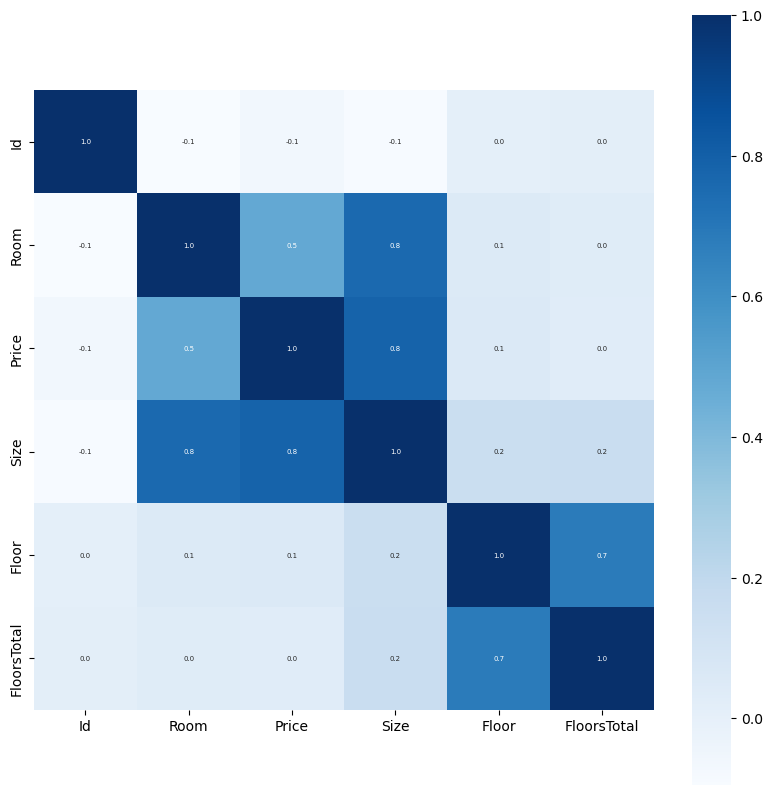

In [9]:
#undferstanding the correlation between the various features in the data(positive or negative)
correlation=house_price_train_dataset_table_new.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':5}, cmap='Blues')


In [10]:
# #a view of the train data set
# print(house_price_train_dataset_table)

In [11]:
# #a view of the first 5 rows of the train dataset
# house_price_train_dataset_table.head()

In [12]:
# #a view of the test data set
# print(house_price_test_dataset_table)

In [13]:
# #a view of the first 5 rows of the test dataset
# house_price_test_dataset_table.head()

In [14]:
# #number of attribute cells without inputs
# house_price_train_dataset_table.isnull().sum()

In [15]:
# #code to view the different attributes of each feature
# house_price_train_dataset_table['Age'].value_counts()